# Problem Set 1 - Neural Network Implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a Feed-forward Neural Network for classification using different approaches. To validate that your code is working and that the network is actually learning something, you can use the MNIST dataset. Finally, please submit proof of the learning progress as described in the assignment.

**Submission Information**:
* Group C
* Hannah Schweren (216579)
* Amin Oueslati (225113)

## Imports

In [20]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from network_scratch import NeuralNetwork
from network_pytorch import NeuralNetworkTorch
from network_tensorflow import NeuralNetworkTf, TimeBasedLearningRate
import utils
import torchvision as tv
import torch

import tensorflow

tf.config.run_functions_eagerly(True)

In [21]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A) Neural Network Classifier from Scratch

### Data


In [22]:
# Download MNIST dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y = tf.keras.utils.to_categorical(y)

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

/opt/homebrew/Caskroom/miniforge/base/envs/deep-learner/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### ML Model & Training

In [23]:
dnn = NeuralNetwork([x_train.shape[1], 2**7, 2**6, 10], learning_rate=1.5, epochs=50)
history = dnn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.55s, Training Accuracy: 74.12%, Validation Accuracy: 68.50%
Epoch: 2, Training Time: 1.12s, Training Accuracy: 87.50%, Validation Accuracy: 79.50%
Epoch: 3, Training Time: 1.66s, Training Accuracy: 92.62%, Validation Accuracy: 82.00%
Epoch: 4, Training Time: 2.21s, Training Accuracy: 95.38%, Validation Accuracy: 83.00%
Epoch: 5, Training Time: 2.76s, Training Accuracy: 95.88%, Validation Accuracy: 83.00%
Epoch: 6, Training Time: 3.32s, Training Accuracy: 97.38%, Validation Accuracy: 84.50%
Epoch: 7, Training Time: 3.87s, Training Accuracy: 98.00%, Validation Accuracy: 87.00%
Epoch: 8, Training Time: 4.42s, Training Accuracy: 98.50%, Validation Accuracy: 86.50%
Epoch: 9, Training Time: 4.97s, Training Accuracy: 98.75%, Validation Accuracy: 85.50%
Epoch: 10, Training Time: 5.51s, Training Accuracy: 98.75%, Validation Accuracy: 87.00%
Epoch: 11, Training Time: 6.07s, Training Accuracy: 99.12%, Validation Accuracy: 86.50%
Epoch: 12, Training Time: 6.62s, Training

### Evaluation

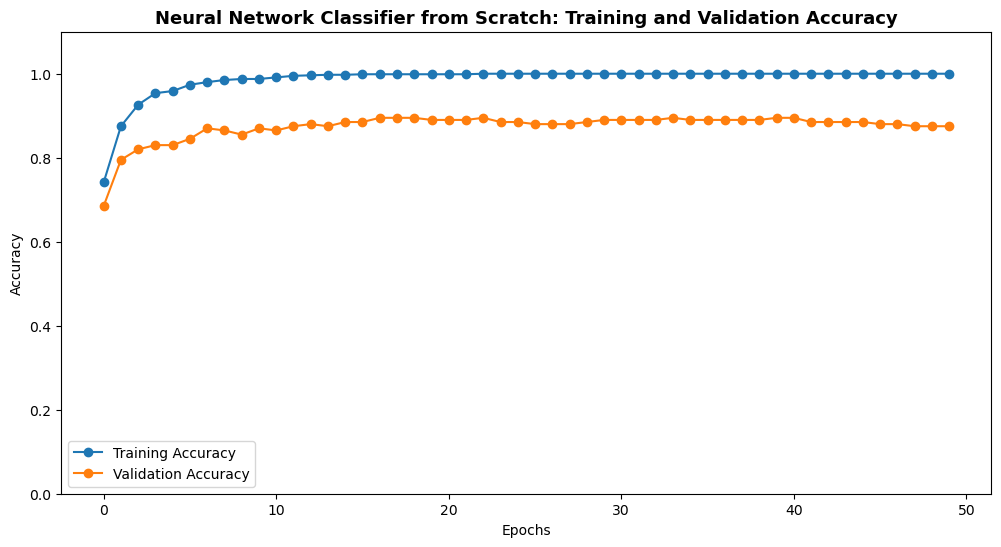

In [24]:
'''TODO: plot accuracy on train and validation set over epochs'''
plt.figure(figsize=(12,6))

plt.plot(history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.title('Neural Network Classifier from Scratch: Training and Validation Accuracy', fontsize=13, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Set the y-axis limits to 0 and 1.1
plt.ylim([0, 1.1])

plt.show()

## B) Neural Network Classifier using PyTorch

### Data

In [25]:
# Define data preprocessing steps
transform = tv.transforms.Compose([
                tv.transforms.ToTensor(),
                tv.transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = tv.datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = tv.datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)

### ML Model & Training

We noticed that at the 1.5 learning rate initially provided by the task, the model was overshooting and getting stuck in a local minimum. Thus, we reduced the learning rate to 0.01, yielding a much better performance. 

In [26]:
model = NeuralNetworkTorch(sizes=[784, 2**7, 2**6, 10], learning_rate=0.01, epochs=50, random_state=GLOBAL_RANDOM_STATE)
history_torch = model.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.88s, Learning Rate: 0.01, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 1.74s, Learning Rate: 0.01, Training Accuracy: 12.10%, Validation Accuracy: 10.10%
Epoch: 3, Training Time: 2.52s, Learning Rate: 0.01, Training Accuracy: 33.00%, Validation Accuracy: 30.10%
Epoch: 4, Training Time: 3.24s, Learning Rate: 0.01, Training Accuracy: 44.00%, Validation Accuracy: 40.60%
Epoch: 5, Training Time: 3.96s, Learning Rate: 0.01, Training Accuracy: 55.80%, Validation Accuracy: 51.10%
Epoch: 6, Training Time: 4.67s, Learning Rate: 0.01, Training Accuracy: 64.40%, Validation Accuracy: 58.00%
Epoch: 7, Training Time: 5.42s, Learning Rate: 0.01, Training Accuracy: 71.00%, Validation Accuracy: 62.70%
Epoch: 8, Training Time: 6.15s, Learning Rate: 0.01, Training Accuracy: 75.50%, Validation Accuracy: 66.90%
Epoch: 9, Training Time: 6.92s, Learning Rate: 0.01, Training Accuracy: 79.00%, Validation Accuracy: 69.90%
Epoch: 10, Training Time: 7.6

### Evaluation

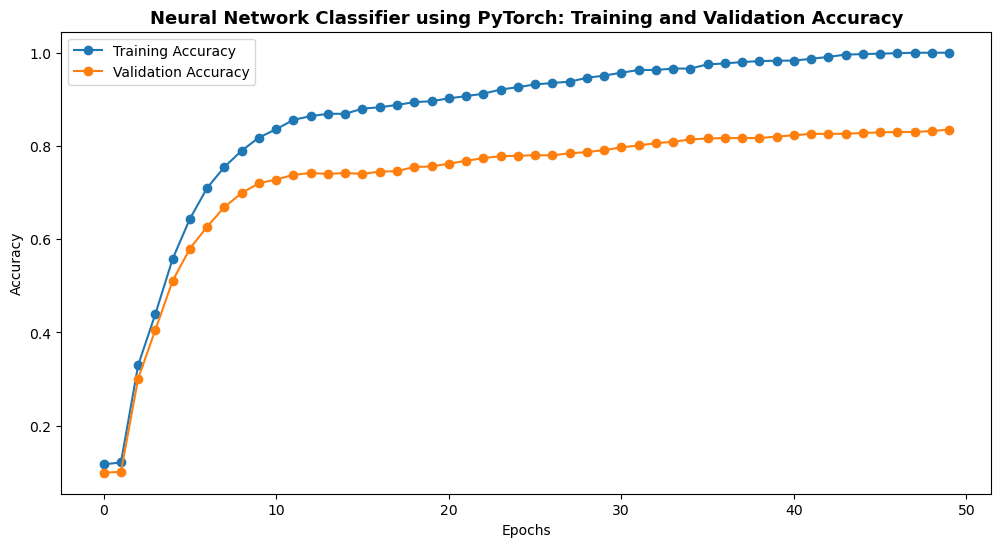

In [27]:
'''TODO: plot accuracy on train and validation set over epochs'''
history_torch

plt.figure(figsize=(12,6))
plt.plot(history_torch['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_torch['val_accuracy'], label='Validation Accuracy', marker='o')

plt.title('Neural Network Classifier using PyTorch: Training and Validation Accuracy', fontsize=13, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## C) Neural Network Classifier using Keras

### Data

In [28]:
# Download MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

# Use only small subset of data for faster training

x_train = x_train[:1000]
y_train = y_train[:1000]

x_val = x_val[:1000]
y_val = y_val[:1000]


### ML Model & Training

We noticed that the time based learning rate regime proposed by the task causes the model to underperform, since both the initial learning rate of 10 and the minimum learning rate of 1 are very large.

As an alternative, we ran a second model using an initial learning rate of 0.05, a decay of 0.001 and a minimum learning rate of 0.01. 

To this end, we also modified the TimeBasedLearningRate class to contain decay and the minimum learning rate as adaptable parameters.

In [34]:
model_tf = NeuralNetworkTf(sizes=[784, 2**7, 2**5, 10])

tb_learning_rate_og = TimeBasedLearningRate(initial_learning_rate=10, decay=1, min_learning_rate=1)
tb_learning_rate_adapted = TimeBasedLearningRate(initial_learning_rate=0.05, decay=0.001, min_learning_rate=0.01)

**Model 1: As required by the task**

* Initial learning rate 10
* 1 decay per step
* Minimum learning rate of 1

In [37]:
# time based learning rate regime
history_tf_og = model_tf.compile_and_fit(x_train, y_train, 
                                      validation_data=(x_val, y_val), 
                                      learning_rate=tb_learning_rate_og,
                                      epochs=50,
                                      batch_size=1)

Epoch 1/50
1000/1000 [==============================] - 28s 28ms/step - loss: 4.8734 - accuracy: 0.0970 - val_loss: 4.3040 - val_accuracy: 0.0890
Epoch 2/50
1000/1000 [==============================] - 29s 29ms/step - loss: 4.5065 - accuracy: 0.1120 - val_loss: 4.9734 - val_accuracy: 0.0870
Epoch 3/50
1000/1000 [==============================] - 27s 27ms/step - loss: 4.5366 - accuracy: 0.1060 - val_loss: 4.7998 - val_accuracy: 0.0870
Epoch 4/50
1000/1000 [==============================] - 27s 27ms/step - loss: 4.5951 - accuracy: 0.0930 - val_loss: 4.7866 - val_accuracy: 0.0940
Epoch 5/50
1000/1000 [==============================] - 26s 26ms/step - loss: 4.5319 - accuracy: 0.1070 - val_loss: 3.7325 - val_accuracy: 0.1100
Epoch 6/50
1000/1000 [==============================] - 27s 27ms/step - loss: 4.5299 - accuracy: 0.1070 - val_loss: 4.2250 - val_accuracy: 0.1100
Epoch 7/50
1000/1000 [==============================] - 26s 26ms/step - loss: 4.5501 - accuracy: 0.1030 - val_loss: 4.7080 -

**Model 2: Alternative model with lower learning rate**

* Initial learning rate 0.5
* 0.001 decay per step
* Minimum learning rate of 0.01

In [35]:
# default constant learning rate of 0.01
history_tf_adapted = model_tf.compile_and_fit(x_train, y_train, 
                                      validation_data=(x_val, y_val),
                                      learning_rate = tb_learning_rate_adapted, 
                                      epochs=50,
                                      batch_size=1)

Epoch 1/50
   1/1000 [..............................] - ETA: 2:15 - loss: 1.8456 - accuracy: 0.0000e+00

/opt/homebrew/Caskroom/miniforge/base/envs/deep-learner/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1000/1000 [==============================] - 26s 26ms/step - loss: 2.3298 - accuracy: 0.0910 - val_loss: 2.3023 - val_accuracy: 0.1450
Epoch 2/50
1000/1000 [==============================] - 26s 26ms/step - loss: 2.3015 - accuracy: 0.1270 - val_loss: 2.3174 - val_accuracy: 0.0950
Epoch 3/50
1000/1000 [==============================] - 27s 27ms/step - loss: 2.2853 - accuracy: 0.1310 - val_loss: 2.2911 - val_accuracy: 0.1100
Epoch 4/50
1000/1000 [==============================] - 27s 27ms/step - loss: 2.2634 - accuracy: 0.1510 - val_loss: 2.2628 - val_accuracy: 0.0990
Epoch 5/50
1000/1000 [==============================] - 26s 26ms/step - loss: 2.2218 - accuracy: 0.1970 - val_loss: 2.2082 - val_accuracy: 0.3000
Epoch 6/50
1000/1000 [==============================] - 26s 26ms/step - loss: 2.1352 - accuracy: 0.2960 - val_loss: 2.0798 - val_accuracy: 0.3680
Epoch 7/50
1000/1000 [==============================] - 28s 28ms/step - loss: 1.9400 - accuracy: 0.3860 - val_loss: 1.8567 - val_accura

### Evaluation

As displayed below, the alternative model with the lower learning rate achieves a significantly better performance:
* Model 1 overshoots and seems stuck in a local minimum at 0.11 validation accuracy
* Model 2 achieves a validation accuracy of approximately 0.80

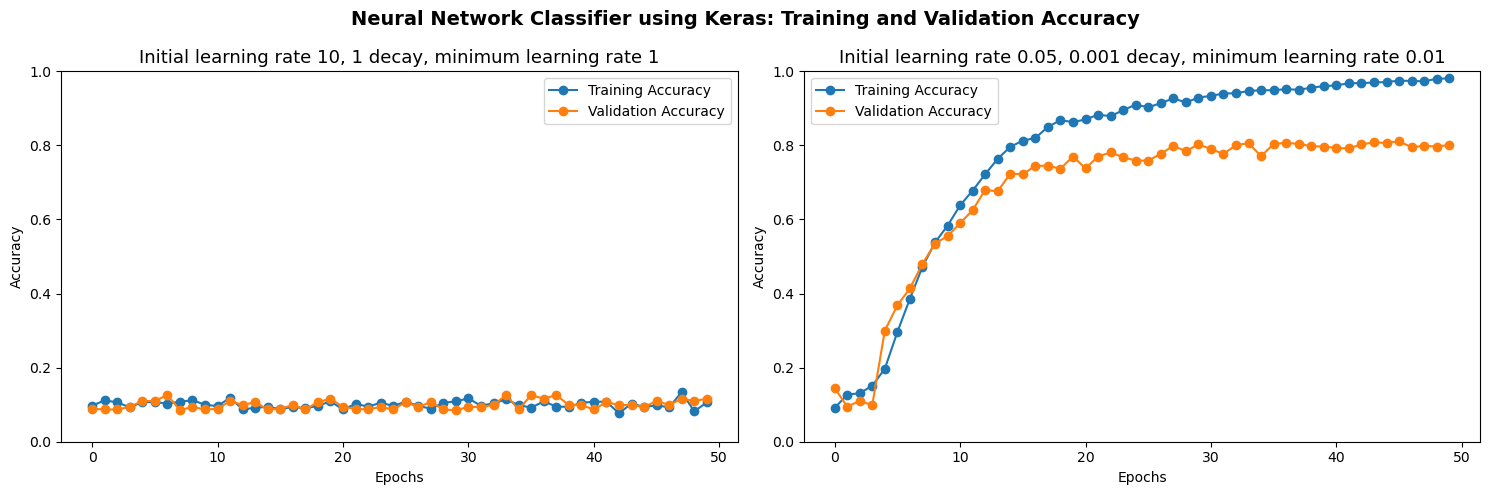

In [39]:
'''TODO: plot accuracy on train and validation set over epochs'''

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Model 1

axes[0].plot(history_tf_og.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history_tf_og.history['val_accuracy'], label='Validation Accuracy', marker='o')

axes[0].set_title('Initial learning rate 10, 1 decay, minimum learning rate 1', fontsize=13)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Model 2

axes[1].plot(history_tf_adapted.history['accuracy'], label='Training Accuracy', marker='o')
axes[1].plot(history_tf_adapted.history['val_accuracy'], label='Validation Accuracy', marker='o')

axes[1].set_title('Initial learning rate 0.05, 0.001 decay, minimum learning rate 0.01', fontsize=13)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Set the y-axis limits to 0 and 1
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])

plt.suptitle('Neural Network Classifier using Keras: Training and Validation Accuracy', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
